In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
# Pulling data in data frames
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print("Train data shape:",train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
# Running few top rows of the table
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Importing Matplotlib
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Analyzing distribution of dependent variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


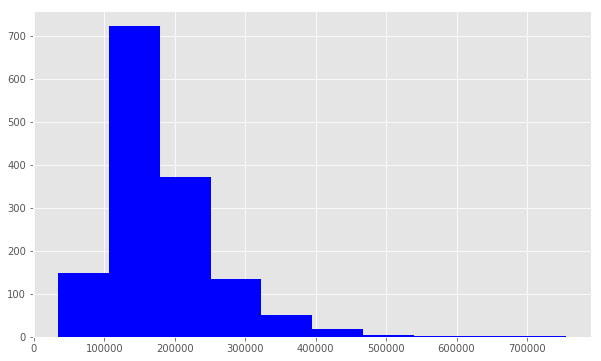

In [9]:
print("Skew is:", train.SalePrice.skew())

plt.hist(train.SalePrice, color = 'blue')
plt.show()

Skew is  0.12133506220520406


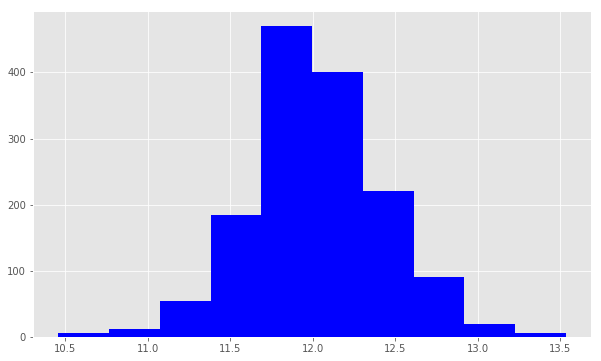

In [10]:
target = np.log(train.SalePrice)
print("Skew is ",target.skew())
plt.hist(target, color ='blue')
plt.show()

# We can see that log SalePrice is better distributed than SalePrice

In [11]:
#Analyzing columns with numeric data

numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
# Checking correlation to ascertain major drivers of dependent variable

corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending = True)[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64


In [13]:
# Picking up top highly positive correlated variable and analyzing the same

train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [14]:
quality_pivot = train.pivot_table( index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


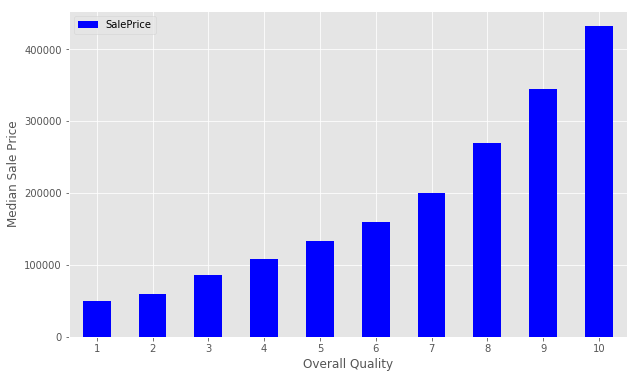

In [15]:
quality_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# We can see that overall quality direcly impacts Sale Price

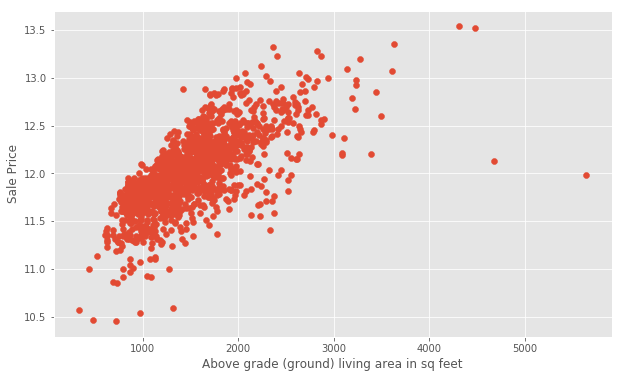

In [16]:
# Analyzing second best correlated variable

plt.scatter(x=train['GrLivArea'], y = target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area in sq feet')
plt.show()

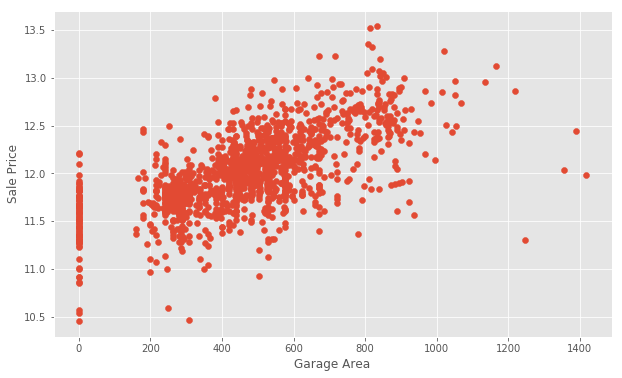

In [17]:
plt.scatter(x=train['GarageArea'], y = target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [18]:
# Removing outliers to smoothen out the data
train = train[train['GarageArea']<1200]

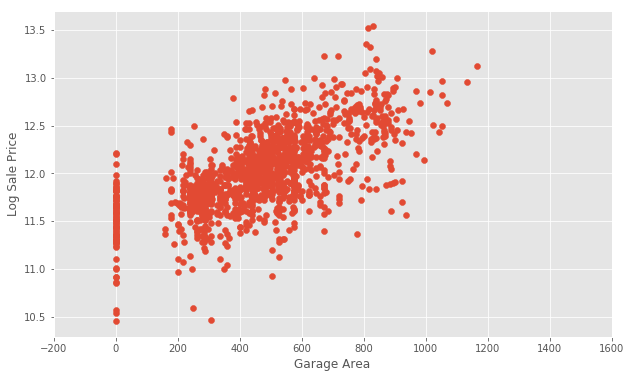

In [19]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.xlim(-200, 1600)
plt.ylabel('Log Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [20]:
# Checking for Null count

nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null counts']
nulls.index.name = 'Feature'
nulls

,Null counts
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [21]:
# Checking unique values in one randomly selected column
print ("Misc feature unique values:", train.MiscFeature.unique())

Misc feature unique values: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [22]:
# Now cleaning up categorical data from dataset and Encoding the same

catergoricals = train.select_dtypes(exclude=[np.number])
catergoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [23]:
print("Original: \n")
print(train.Street.value_counts(), "/n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 /n


In [24]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [25]:
print('Encode: /n')
print(train.enc_street.value_counts())

Encode: /n
1    1450
0       5
Name: enc_street, dtype: int64


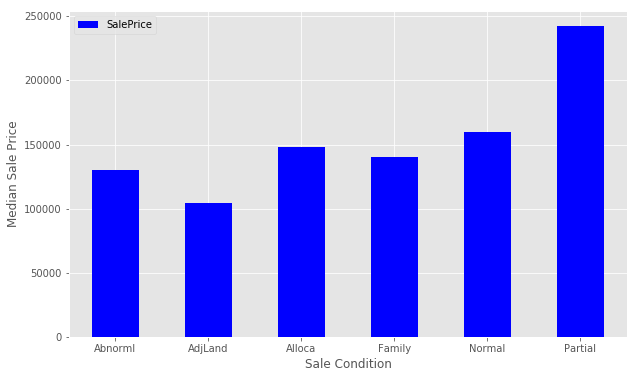

In [26]:
# Checking for Sale Condition's impact of Sale Price

condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [27]:
# We see that Partial has highest median Sale Price. Hence encoding Partial.

def encode(x):
    return 1 if x == 'Partial' else 0

train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

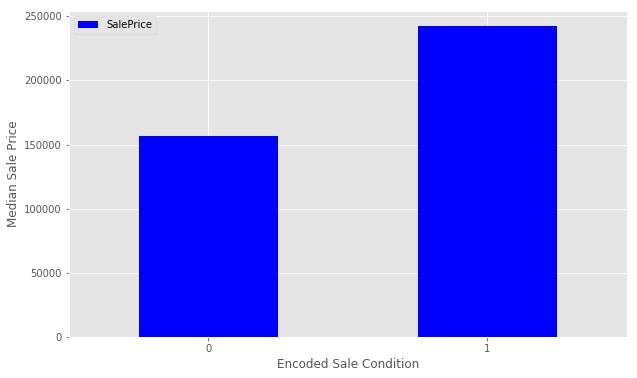

In [28]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [29]:
# Cleaning up data using interpolation

data = train.select_dtypes(include = [np.number]).interpolate().dropna()
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0


In [30]:
sum(data.isnull().sum() != 0)

0

In [31]:
# Building datasets into dependent and independent variables

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis = 1)

In [32]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,1,0


In [33]:
# Importing slkearn to split data in traina nd test data sets. Entire "train" data is not used to avoide over-fitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state = 42, test_size = .33)

In [34]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
1101,20,61.000000,9758,5,5,1971,1971,0.0,412,287,...,0,0,0,0,0,0,7,2007,1,0
845,85,87.500000,16647,5,5,1975,1981,0.0,1390,0,...,0,0,0,0,0,0,1,2007,1,0
615,85,80.000000,8800,6,7,1963,1963,156.0,763,0,...,0,0,0,0,0,0,5,2010,1,0
1324,20,75.000000,9986,8,5,2006,2007,428.0,0,0,...,49,0,0,0,0,0,2,2007,1,1
308,30,98.666667,12342,4,5,1940,1950,0.0,262,0,...,0,0,0,0,0,0,3,2009,1,0


In [35]:
# Running up regression model

from sklearn import linear_model
lr = linear_model.LinearRegression()

In [36]:
model = lr.fit(X_train, y_train)

In [37]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [38]:
print ("R square of the model is: \n", model.score(X_test, y_test))

R square of the model is: 
 0.8882477709262553


In [39]:
# Running Linear regression model to predict values with X_test data

predictions = model.predict(X_test)

In [40]:
predictions

array([11.91390437, 12.04903047, 11.77351971, 11.79183754, 11.26944723,
       11.36259336, 12.3362407 , 11.70692621, 12.02044888, 11.89282643,
       11.80303488, 12.52549124, 12.23583076, 12.66295987, 11.90296635,
       11.62128418, 12.1919155 , 11.61969317, 12.37146945, 12.27316306,
       11.33327942, 12.3630367 , 11.44804859, 11.72134009, 12.19104716,
       11.91161769, 11.6433826 , 11.4860541 , 12.32332516, 11.94553991,
       11.65717913, 12.12799034, 11.66691198, 11.56756839, 11.74181221,
       12.3920184 , 12.59215247, 12.00639302, 12.34095517, 11.41681793,
       11.72065203, 12.37584697, 11.83576534, 11.93728211, 12.64925015,
       12.23261664, 12.11452897, 11.79781201, 11.79057937, 12.16953158,
       11.67054344, 11.43713533, 12.23283768, 11.70680316, 12.14497386,
       12.40961117, 12.2527589 , 12.32095295, 11.62612877, 12.00464307,
       11.30436588, 11.74807775, 12.56226081, 12.6265578 , 12.33774682,
       12.25758371, 12.47481531, 12.71448996, 12.33304509, 11.95

In [41]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519567567


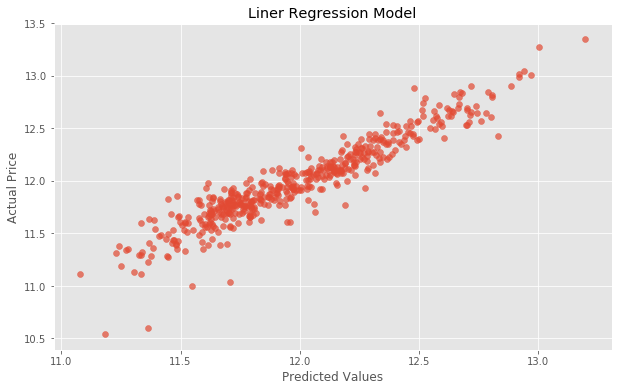

In [42]:
# plotting chart between Actual and Predicted values

actual_values = y_test
plt.scatter(predictions, actual_values, alpha = .7)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Price')
plt.title('Liner Regression Model')
plt.show()

# Graph show a good linear fit

In [43]:
actual_values

497     12.122691
1265    12.122147
411     11.884489
1048    11.652687
1035    11.338572
          ...    
390     11.686879
600     12.524526
847     11.801857
1256    12.616525
482     11.951180
Name: SalePrice, Length: 481, dtype: float64

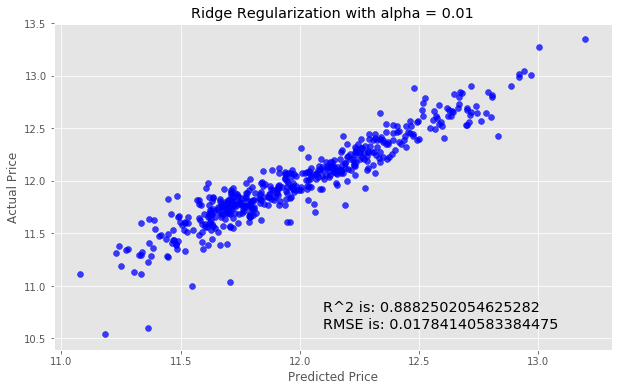

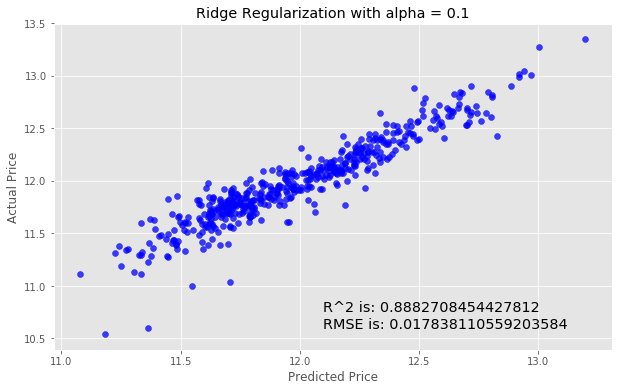

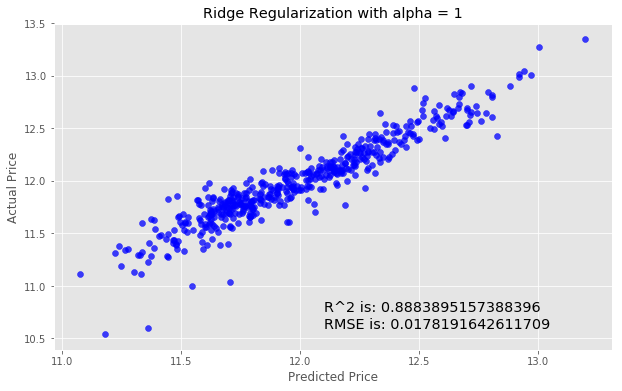

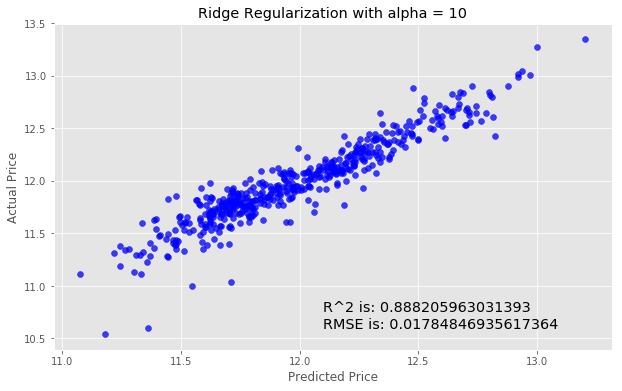

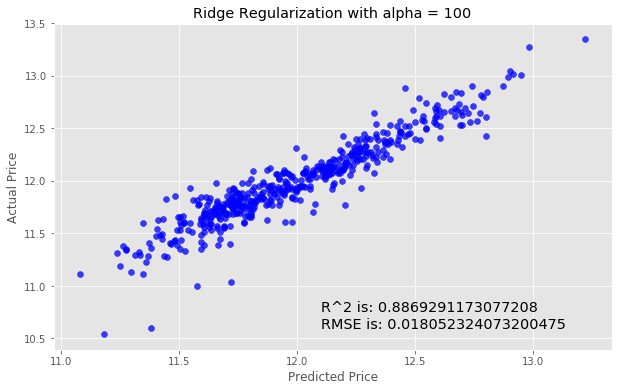

In [44]:
# Using Ridge regression to improve the model

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [46]:
# Running code for submission

submission = pd.DataFrame()
submission['Id'] = test.Id

In [48]:
feats = test.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()

In [49]:
predictions = model.predict(feats)

final_predictions = np.exp(predictions)

print ("Original predictions are:\n", predictions[:5], "\n")
print("Final predictions are:\n", final_predictions[:5])

Original predictions are:
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are:
 [128959.49172586 122920.7402436  175704.82598102 200050.83263756
 182075.46986405]


In [50]:
submission['SalePrice']= final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [53]:
submission.to_csv('submission.csv', index = False)

<a href="./submission.csv"> Download File </a>